# **STATISTIK & SANNOLIKHET**

### **Scipy**

##### **SciPy-funktioner:**  

In [20]:
from scipy.stats import binom
import numpy as np 

# example values    
n = 12
p = 0.7
k = 7



**Beräkna medelvärde (väntvärde(förväntat värde)):**

In [13]:
binom.mean(n, p)  

np.float64(16800.0)


  
**Beräkna standardavvikelse** 

In [14]:
np.sqrt(binom.var(n, p)) 

np.float64(70.99295739719541)


**Diskret Binomial**

In [21]:
binom.pmf(k, n, p) # Exakt k, Sannolikhet
binom.cdf(k, n, p) # Högst k, Kumulativ
binom.sf(k-1, n, p) # Minst k, Survival 

print(binom.pmf(k, n, p), binom.cdf(k, n, p), binom.sf(k-1, n, p))

0.15849579160800015 0.27634453047000007 0.8821512611379999


**Sannolikhet eller Rimlighet?**

| Del                           | Typ                     |
| ----------------------------- | ----------------------- |
| Definiera p, n, X             | Sannolikhet             |
| Räkna E[X] = np               | Sannolikhet             |
| Jämföra med observerat värde  | Rimlighet               |
| Avgöra om något är “ovanligt” | Rimlighet               |
| Använda 5%-regel, z-värde     | Rimlighet + sannolikhet |


## **DATA & URVAL** 

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Population** Alla individer/observationer av intresse  

**Stickprov** Delmängd av populationen  
- Stickprovsstorlek (n)
- Oberoende observationer
- Representativitet

**Urvalsmetoder**
- Obundet slumpmässigt urval (OSU)
- Stratifierat urval

**Ground truth**
- Okänd sann parameter i populationen
- Skattas med stickprovsstatistik


</div>

## **SANNOLIKHETSLÄRA**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Utfallsrum (S)** Alla möjliga utfall    

**Händelse (A)** Delmängd av S (A ⊆ S)
- Händelseoperationer (mängder)
  - Komplement: Aᶜ
  - Union: A ∪ B
  - Snitt: A ∩ B

**Sannolikhetsbegrepp**
- Klassisk sannolikhet
  - P(A) = |A| / |S|
- Relativ frekvens (frequentistisk)
  - P(A) ≈ f / n (vid många försök)
    
**Sannolikhetsregler**
- Komplement: Aᶜ
- Union: A ∪ B
- Snitt: A ∩ B  
  
**Relation mellan händelser**
- Betingad sannolikhet (definition)
  - P(A | B)=P(A∩B)/P(B)
- Oberoende händelser (egenskap)
  - P(A | B) ⇔ P(A∩B)=P(A)P(B)
- Beroende händelser (egenskap)
  - P(A | B)≠P(A)

</div>

## **KOMBINATORIK**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Klassisk sannolikhet: P(A)=|A|/|S|**  

**Fakultet**
- n! = n·(n−1)·…·1

**Ordning spelar roll (Permutationer)**
- Utan återläggning
  - nPr = n! / (n−r)!
- Med återläggning
  - nʳ

**Ordning spelar ej roll (Kombinationer)**
- Utan återläggning
  - nCr = n! / (r!(n−r)!)
- Med återläggning
  - (n+r−1)Cr

**Uppräkning → sannolikhetsberäkning**
- Ger |A| och |S|
- Används i klassisk sannolikhet

</div>

## **FÖRDELNINGAR**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Sannolikhetsfunktion**
- PMF (Probability Mass Function)
  - Diskreta slumpvariabler
- PDF (Probability Density Function)
  - Kontinuerliga slumpvariabler

**Fördelningsfunktion (CDF)**  (Cumulative distribution function: F)  
F(x) = P(X ≤ x)  
Beskriver ackumulerad sannolikhet  
  
- Diskret slumpvariabel X
  - Trappfunktion
  - P(a ≤ X ≤ b) = F(b) − F(a − 1)

- Kontinuerlig slumpvariabel X
  - Kontinuerlig funktion
  - P(a ≤ X ≤ b) = F(b) − F(a)

- Invers:
  - PPF (Percent Point Function)
  - Används för kvantiler och konfidensintervall

**Parametrar (det vi skattar)**
- μ (väntevärde / medel)
- σ² (varians)

**Diskreta fördelningar** (Slumpvariabeln X är diskret)
- Binomial
- Geometrisk
- Negativ binomial

**Kontinuerliga fördelningar** (Slumpvariabeln X är kontinuerlig)

- Datagenererande fördelningar
  - Normal
  - Exponential
  - Gamma

- Inferensfördelningar
  - Standardnormal (Z)
    - Konfidensintervall när σ är känd
  - t-fördelning
    - Konfidensintervall när σ är okänd (vanligast)
  - χ²-fördelning
    - Konfidensintervall för varians
  - F-fördelning
    - Konfidensintervall och test i regression

**Koppling till statistisk inferens**
- Fördelningar används för:
  - Skattningar
  - Konfidensintervall
  - Hypotesprövning

</div>

#### **Diskreta fördelningar**

**Binomial**

Om 10 personer går in i ett rum, hur många detektioner är sannolikt? (p=.7)

In [ ]:
binom.mean(10, 0.7)

np.float64(7.0)

p = sannolikhet (70%)   
n = Totala antalet personer (10)  
X = slumpvariabeln som anger antalet detekterade personer  
E = väntevärde (förväntat värde)  
  
E[X]= np = 10*0.7 = 7   

**Datagenererande fördelningar**

**Normal**
  - Används främst inom:

    - Beskrivande statistik (tolkning av data)

    - Statistisk inferens (rimlighetsbedömning, outliers, test/CI-intuition)

    - Det är inte en exakt regel eller ett test, utan en tumregel/intuition.

Exempel på ett "mycket ovanlig värde": 

In [22]:
from scipy.stats import binom
import numpy as np

n = 24000
p = 0.7

mu = binom.mean(n, p)
sigma = np.sqrt(binom.var(n, p))
very_unusual_few = mu - 3 * sigma

print(mu)
print(sigma)
print(very_unusual_few)


16800.0
70.99295739719541
16587.021127808413


**Normalfördelningsintuition**  
I en normalfördelning gäller den s.k. 68–95–99.7-regeln:

±1σ → ca 68 % av observationerna

±2σ → ca 95 %

±3σ → ca 99.7 %

Det betyder att utanför ±3 standardavvikelser ligger bara ca 0.3 % av alla observationer totalt
(≈ 0.15 % i varje svans).

Alltså:

“Mycket ovanligt” = ett värde som ligger mer än 3σ från medelvärdet
(|Z| ≥ 3)

#### **Fördelningsfunktion (CDF)**

- För diskreta variabler gäller:

F(x) = P(X ≤ x)

P(a ≤ X ≤ b) = F(b) − F(a − 1)

Exempeluppgift:  

12 personer – sannolikhet att mellan 2 och 7 detekteras (70% chans att en upptäcks, p = .7)  

Här är:
n = 12
p = 0.7

Vi söker:
P(2 ≤ X ≤ 7)

För att beräkna sannolikheten används den kumulativa fördelningsfunktionen (CDF) för binomialfördelningen i scipy.stats.
Parametrarna sätts till n = 12 (antal försök) och p = 0.7 (sannolikhet för ett lyckat försök).

Först beräknas F(7) = P(X ≤ 7), vilket motsvarar sannolikheten för alla utfall från 0 till och med 7.
Därefter beräknas F(1) = P(X ≤ 1), vilket motsvarar sannolikheten för utfallen 0 och 1.

Skillnaden mellan dessa två värden ger sannolikheten för spannet 2 till 7:
P(2 ≤ X ≤ 7) = F(7) − F(1).

För en diskret variabel gäller att P(2 ≤ X ≤ 7) kan beräknas med CDF som F(7) − F(1), där F(x) = P(X ≤ x).

In [ ]:


from scipy.stats import binom

# (k, n, p)

print(binom.cdf(7, 12, 0.7)) # Cumulative probability of getting at most 5 successes in 5 trials with a success probability of 0.7
print(binom.cdf(7, 12, 0.7) - binom.cdf(1, 12, 0.7)) 
# Probability of getting exactly 7 successes in 12 trials with a success probability of 0.7




0.27634453047000007
0.2763291186810001


Antag att X är antalet detekterade personer.
Varje person detekteras med sannolikhet p = 0.7 och totalt går n = 5 personer in.

**Exakt antal**

Om frågan är:
“Vad är sannolikheten att exakt 3 personer detekteras?”

Då modelleras detta som:
X ~ Binomial(n = 5, p = 0.7)

Vi söker sannolikheten:
P(X = 3)

Detta beräknas med sannolikhetsfunktionen (PMF) för binomialfördelningen:

In [ ]:
print(binom.pmf(3, 5, 0.7))

0.30869999999999986


**Högst eller minst ett visst antal**

Om frågan istället är:
“Vad är sannolikheten att **högst** 3 personer detekteras?”

Då söker vi:
P(X ≤ 3)

Detta beräknas med den kumulativa fördelningsfunktionen (CDF):

In [ ]:
binom.cdf(3, 5, 0.7)

np.float64(0.4717800000000001)

Om frågan istället är:
“Vad är sannolikheten att **minst** 3 personer detekteras?”

Då söker vi:
P(X ≥ 3)

Detta kan beräknas som:
1 − binom.cdf(2, 5, 0.7)

Alternativt med överlevnadsfunktionen (SF):

In [ ]:
binom.sf(2, 5, 0.7)

np.float64(0.8369199999999999)

Om 3 personer detekterats hur stor rimlighet är det att 5 personer gått in?  

Eftersom antalet detekterade personer är en diskret variabel används probability mass function (PMF).
Frågan “hur rimligt är det att 5 personer gått in givet att 3 detekterats” beskriver en betingad sannolikhet och kräver ett antagande om fördelningen för antalet personer som gått in.

Om frågan tolkas som en betingad sannolikhet, dvs.
P(N = 5 | X = 3), där N är antalet som gått in och X är antalet detekterade, behöver vi använda Bayers sats för att kunna beräkna P(N = 5 | X = 3). 

För att beräkna rimligheten måste man veta hur sannolikt olika värden på N är från början, dvs. ha en fördelning (prior) för N.
Utan denna information kan man inte vända på villkoret från P(X | N) till P(N | X), vilket kräver Bayes sats.

“probability mass function” rather than the term “density.”   

**Kontinuerliga fördelningar**

- **t-fördelning**

![alt text](T-fördelning-kurva.jpg)

## **Moment och teoretiska mått**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Väntevärde**
- E[X] = μ

**Varians**
- Var(X) = σ²

**Standardavvikelse**
- σ = √σ²

**Högre moment**
- Skevhet
- Kurtosis

</div>

## **Beskrivande statistik**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>
  
**Lägesmått**
- Medelvärde
- Median
- Typvärde

**Spridningsmått**
- Varians
- Standardavvikelse
- Kvartiler och IQR
- Interkvartilavstånd 

**Visualisering**
- Histogram
- Kumulativt histogram
- Boxplot
- Probplot

</div>

#### **Lägesmått**

- **Medelvärde**

In [16]:
binom.mean(n, p)

np.float64(16800.0)

#### **Spridningsmått**

- **Standardavvikelse**

In [ ]:
sigma = np.sqrt(binom.var(n, p)) # sigma 1 standard deviation 

## **Statistisk inferens**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Skattningar**
- Stickprovsmedel: x̄
- Stickprovsvarians: S²

**Teoretisk grund**
- Centrala gränsvärdessatsen (CLT)
  - Stickprovsmedel är (ungefär) normalfördelat när n är stort
- De stora talens lag
  - Relativ frekvens: f / n → P(A)

**Konfidensintervall**
- Bygger på skattningar + CLT
- Konfidensnivå: (1 − α)
- För medelvärde μ
  - z-intervall (σ känd)
  - t-intervall (σ okänd)
- För varians σ²
  - χ²-intervall
- För modellparametrar (t, F)

</div>

Konfidensintervall (CI)

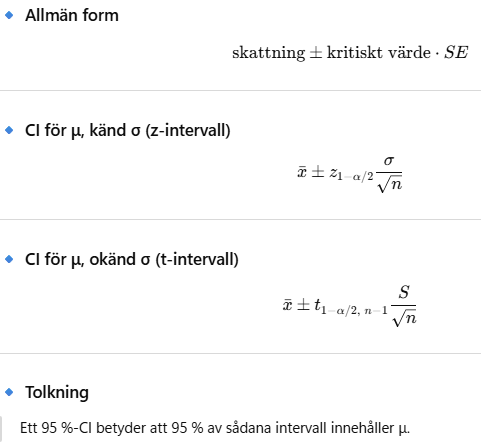

## **hypotesprövning**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Hypoteser**
- Nollhypotes H₀
  - Standardantagande (”ingen effekt”)
- Alternativhypotes H₁
  - Det vi vill undersöka/stödja

**Testuppställning**
- Ensidigt test
  - Avvikelse i en riktning
- Tvåsidigt test
  - Avvikelse i båda riktningar

**Teststorheter**
- Teststatistika
  - Beror på vald fördelning (Z, t, χ², F)
- p-värde
  - Sannolikhet att observera data (eller extremare) givet H₀

**Signifikans**
- Signifikansnivå α
  - Gräns för att förkasta H₀
- Typ I-fel
  - Förkasta sann H₀
- Typ II-fel
  - Behålla falsk H₀

</div>

Hypotetsprövning

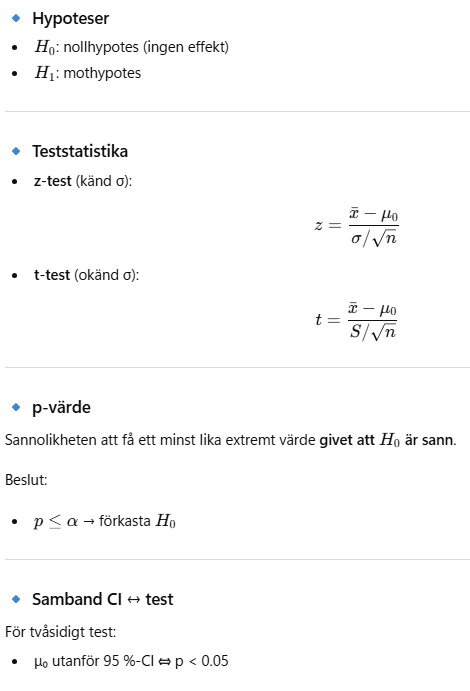

## **Gemensamma fördelningar**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Gemensam fördelning**
- f(X, Y)
- Beskriver sannolikheten för två slumpvariabler samtidigt

**Marginalfördelningar**
- f_X(x)
  - Fördelningen för X oberoende av Y
- f_Y(y)
  - Fördelningen för Y oberoende av X

**Relation mellan variabler**
- Oberoende variabler
  - f(X, Y) = f_X(x) f_Y(y)
- Beroende variabler
  - Gemensam fördelning kan ej faktoriseras

**Mått på beroende**
- Kovarians
  - Mäter samvariation mellan X och Y
- Korrelation
  - Standardiserad kovarians
  - Värden mellan −1 och 1

</div>

## **Regression**

<div style="background-color:#E2F5CD; padding:15px; border-radius:8px;">
<center>
<b>Sammanfattning:</b>
</center>

**Linjär modell**
- Responsvariabel: Y
- Prediktorer: X₁, X₂, …
- Koefficienter: β₀, β₁, …
- Felterm: ε
- Modell:
  - Y = β₀ + β₁X₁ + … + ε
- Eventuella interaktionseffekter

**Skattning**
- Minsta kvadratmetoden (OLS)
  - Skattar β genom att minimera summan av kvadrerade residualer

**Residualer och felmått**
- Residual: observerat värde − predikterat värde
- SSE (Sum of Squared Errors)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)

**Modellutvärdering**
- R² (förklaringsgrad)
  - Andel av variationen i Y som förklaras av modellen

**Signifikans i regression**
- t-test för parametrar
  - Testar om enskilda β skiljer sig signifikant från 0
- F-test för modell
  - Testar om modellen som helhet är signifikant

</div>

Regression  
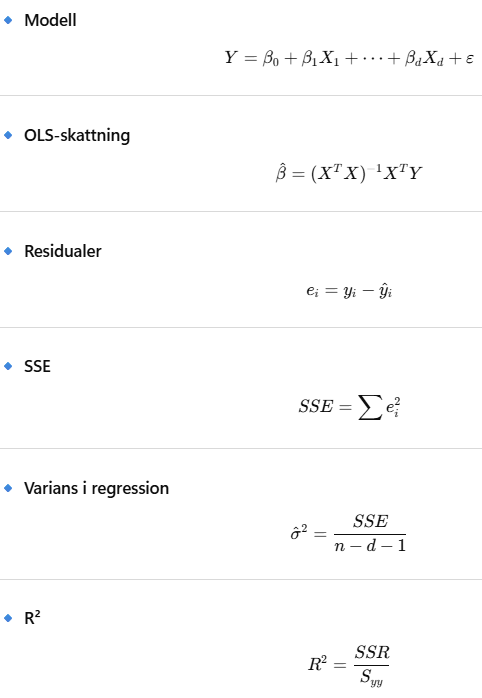